<font face="gotham" color="purple"> **MACROECONOMÍA II \\
Tópico: Dinámica Macroeconómica**</font>

`Luis Chávez`

![texto del vínculo](https://fedor.iskh.me/assets/img/dag3logo.png)

# <font face="gotham" color="purple"> **1. Modelo dinámico básico**</font>

Sea:
$$C(t)=a+bY(t)$$
$$D(t)=C(t)+I+G$$
$$\Delta Y(t+1)=\lambda[D(t)-Y(t)], \ \lambda>0$$
$$\Delta Y(t+1)=0$$

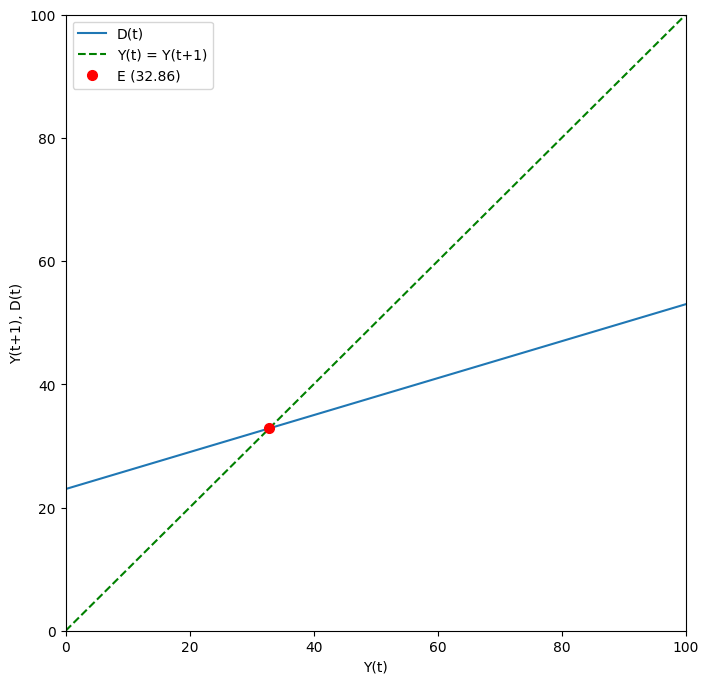

In [1]:
# Equilibrio
# ==============================================================================
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
lambd = 0.8
a = 10
I = 5
G = 8
b = 0.3

# Ploteo D(t) y Y(t)
plt.figure(figsize=(8, 8))

# Rango de valores de Y
Y_range = np.linspace(0, 100, 100)

# D(t) = a + I + G + b*Y(t)
D_values = (a + I + G) + b * Y_range

plt.plot(Y_range, D_values, label='D(t)')

# Línea de 45 grados Y(t) = Y(t+1)
plt.plot(Y_range, Y_range, linestyle='--', color='green', label='Y(t) = Y(t+1)')

# Punto de equilibrio
Y_eq = (a + I + G) / (1 - b)
D_eq = a + I + G + b * Y_eq
plt.plot(Y_eq, D_eq, 'ro', markersize=7, label=f'E ({Y_eq:.2f})')

plt.xlabel('Y(t)')
plt.ylabel('Y(t+1), D(t)')
plt.legend()
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.show()

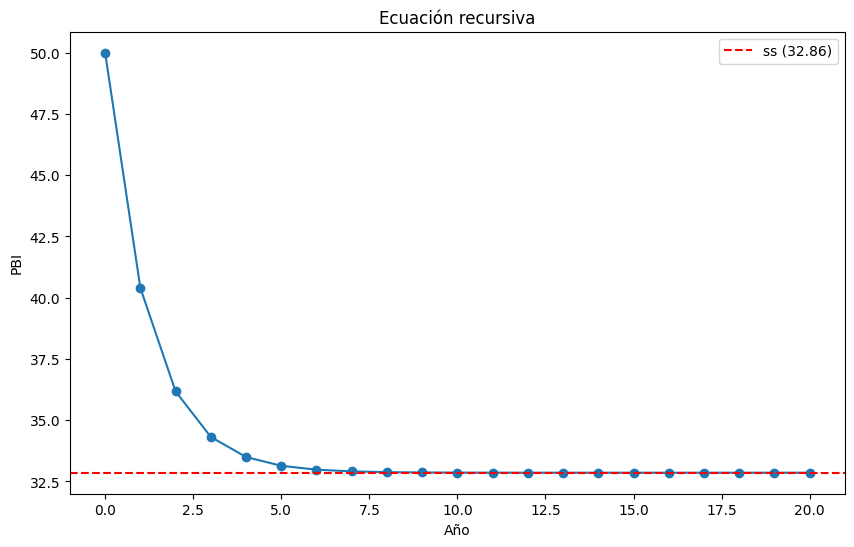

In [2]:
# Ecuación recursiva
# ==============================================================================
import matplotlib.pyplot as plt

# Ecuación recursiva
def y_recursive(Y_t, lambd, a, I, G, b):
  """Calcula Y(t+1)"""
  return lambd * (a + I + G) + (1 - lambd * (1 - b)) * Y_t

# Condición inicial
Y_0 = 50

# Simular
num_steps = 20 #periodos
Y_values = [Y_0]

for t in range(num_steps):
  Y_t1 = y_recursive(Y_values[-1], lambd, a, I, G, b)
  Y_values.append(Y_t1)

# Y_ss
Y_ss = (a + I + G) / (1 - b)

# Ploteo
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps + 1), Y_values, marker='o', linestyle='-')
plt.axhline(y=Y_ss, color='r', linestyle='--', label=f'ss ({Y_ss:.2f})')
plt.xlabel('Año')
plt.ylabel('PBI')
plt.title('Ecuación recursiva')
plt.legend()
plt.show()

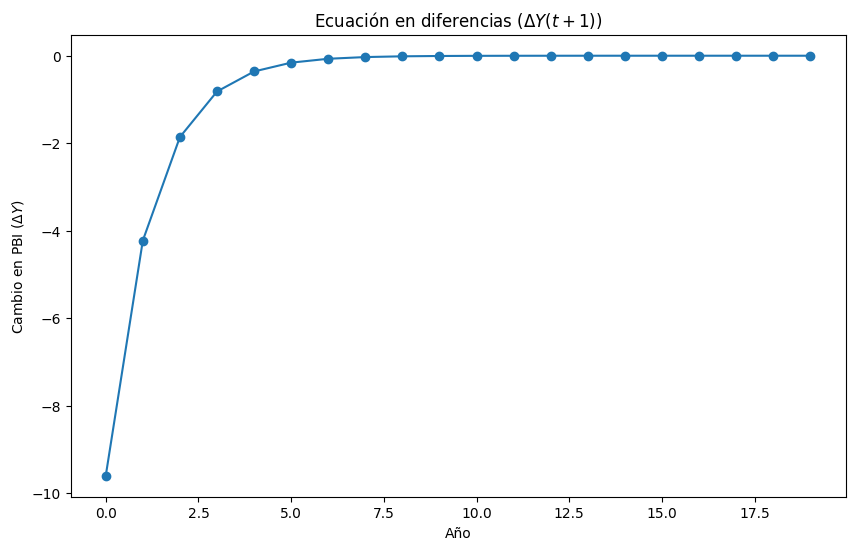

In [3]:
# Ecuación en diferencia
# ==============================================================================
import matplotlib.pyplot as plt
# Ecuación en diferencia
def delta_y(Y_t, lambd, a, I, G, b):
  """Calculates the change in Y (Delta Y)."""
  return lambd * (a + I + G) - lambd * (1 - b) * Y_t

# Valores de Delta Y
delta_Y_values = [delta_y(Y_values[t], lambd, a, I, G, b) for t in range(num_steps)]

# Ploteo
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps), delta_Y_values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Cambio en PBI ($\Delta Y$)')
plt.title('Ecuación en diferencias ($\Delta Y(t+1)$)')
plt.show()

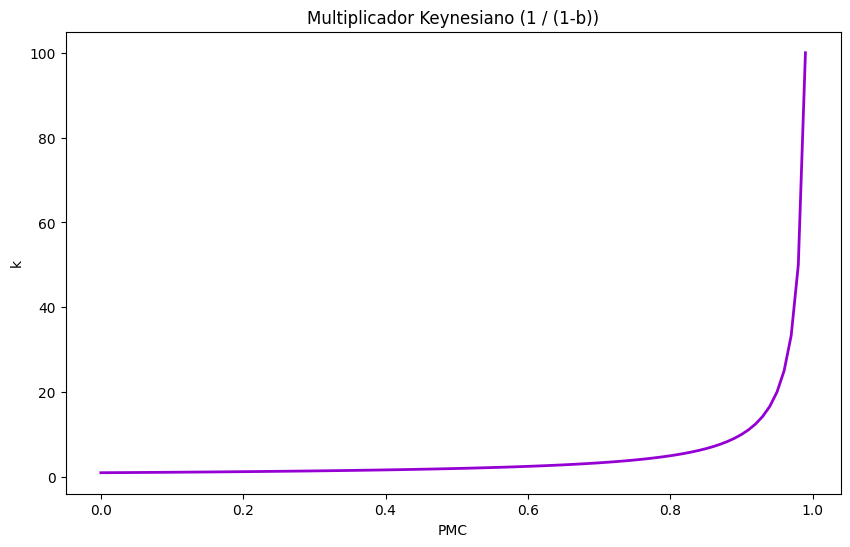

In [4]:
# Multiplicador
# ==============================================================================

import matplotlib.pyplot as plt
import numpy as np

# Valores de b
b_values = np.linspace(0, 0.99, 100)  # 100 valores, pero b!=1

# Calcular el multiplicador
multiplier = 1 / (1 - b_values)

# Ploteo
plt.figure(figsize=(10, 6))
plt.plot(b_values, multiplier, color='darkviolet', linewidth=2)
plt.xlabel('PMC')
plt.ylabel('k')
plt.title('Multiplicador Keynesiano (1 / (1-b))')
plt.show()

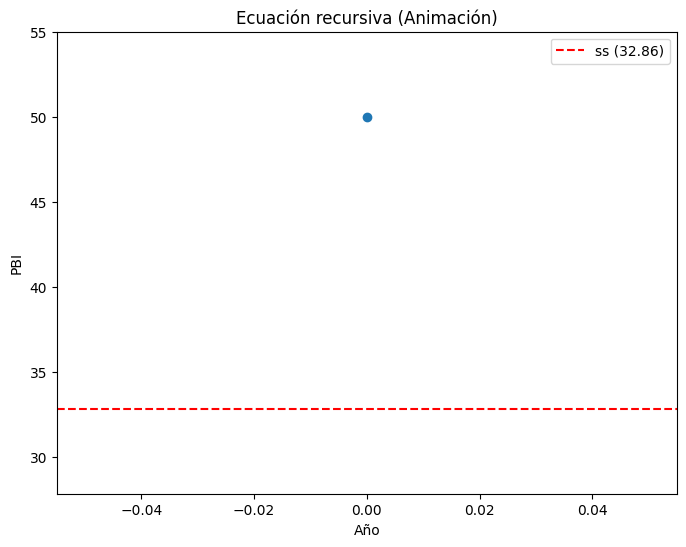

In [5]:
# Animación
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation # Import FuncAnimation
from IPython.display import HTML # Import HTML for displaying animation

def animate(i):
    plt.cla()
    plt.plot(range(i + 1), Y_values[:i + 1], marker='o', linestyle='-')
    plt.axhline(y=Y_ss, color='r', linestyle='--', label=f'ss ({Y_ss:.2f})')
    plt.xlabel('Año')
    plt.ylabel('PBI')
    plt.title('Ecuación recursiva (Animación)')
    plt.legend()
    plt.ylim(min(Y_values) - 5, max(Y_values) + 5)

fig, ax = plt.subplots(figsize=(8, 6))

ani = FuncAnimation(fig, animate, frames=num_steps + 1, repeat=False)
HTML(ani.to_jshtml())